# LAB4 - TensorFlow Lite
ver: 3

Przedmiot: _Sztuczna Inteligencja w Systemach Informatycznych_

Autor: Tomasz Szydło

kontakt: tszydlo@agh.edu.pl


## Wprowadzenie

Celem zajęć jest analiza działania konwersji sieci neuronowych do postaci możliwej do uruchomienia na urządzeniach o ograniczonych zasobach. W czasie zajęć będzie wykorzystywany zbiór Fashion MNIST, który zawiera 60000 obrazków w 10 kategoriach:

https://github.com/zalandoresearch/fashion-mnist


https://www.tensorflow.org/datasets/catalog/fashion_mnist


### Środowisko pracy - Google Codelab

https://codelabs.developers.google.com/?cat=Machine+Learning



In [1]:
try:
  %tensorflow_version 2.x
except:
  pass

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, AveragePooling2D, MaxPooling2D

from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import pathlib

import time

print(tf.__version__)

2.8.0


Przygotuj zbiór testowy. Zbiór fashion_mnist nie posiada słownych opisów klas.

In [3]:
nb_classes = 10
class_names = ['T-shirt_top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Wypisz ilość elementów w zbiorze uczącym i testowym.





In [4]:
print(X_test)
print(X_train)

print(len(list(X_test)))
print(len(list(X_train)))

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ...

**TODO** Zmień poniższy kod tak by wyświetlić 10 przykładowych obrazków - po jednym z każdej klasy.

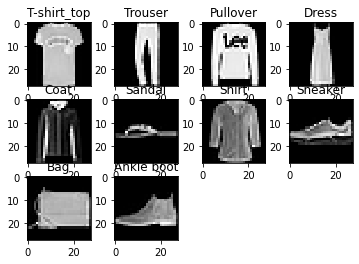

In [8]:
def find_i(class_name):
  i=0
  while(class_names[y_test[i]] != class_name):
    i+=1
  return i

j=0
for class_name in class_names:
    i = find_i(class_name)
    plt.subplot(3,4,j+1)
    plt.imshow(X_test[i], cmap='gray', interpolation='none')
    plt.title("{}".format(class_names[y_test[i]]))
    j = j +1

Sieć neuronowa przyjmuje na wejściu obrazek z jednym kanałem - poziomem jasności, więc konieczne jest przekształcenie danych wejściowych, aby każdy obraz 28 x 28 stał się macierzą 28 x 28 x 1. 

Skalujemy również dane wejściowe w zakresie [0–1] zamiast [0–255]

In [9]:
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

print(nb_classes)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)
10


Zmodyfikuj macierze wyjść korzystając z techniki One Hot Encoding, tj.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
```
itp.

In [10]:
Y_train = np_utils.to_categorical(y_train, num_classes = 10)
Y_test = np_utils.to_categorical(y_test, num_classes = 10)

Wielowarstwowa sieć konwolucyjna do klasyfikacji ubrań.

In [11]:
model = Sequential([
  Conv2D(16, 3, activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 64)                247872    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

W celu skrócenia czasu uczenia sieci wskazane jest użycie GPU.

In [13]:
model.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 21s 6ms/step - loss: 0.4297 - accuracy: 0.8449 - val_loss: 0.3249 - val_accuracy: 0.8851
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2837 - accuracy: 0.8970 - val_loss: 0.2901 - val_accuracy: 0.8949
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2375 - accuracy: 0.9128 - val_loss: 0.2726 - val_accuracy: 0.9013
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2034 - accuracy: 0.9243 - val_loss: 0.2477 - val_accuracy: 0.9135
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1773 - accuracy: 0.9339 - val_loss: 0.2432 - val_accuracy: 0.9180
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1510 - accuracy: 0.9441 - val_loss: 0.2634 - val_accuracy: 0.9143
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1306 - accuracy: 0.9513 - val_loss: 0.2499 - val_ac

# Zapisywanie NN

Szczegółowe informacje dotyczące zapisywania modeli TensorFlow dostępne pod linkiem:

https://www.tensorflow.org/tutorials/keras/save_and_load

In [14]:
export_dir = 'saved_model'
model.save(export_dir)

INFO:tensorflow:Assets written to: saved_model/assets


Po zapisaniu modelu należy kliknąć "Refresh" po lewej stronie w zakładce "Files". W katalogu "saved_model" znajduje się zapisany model.

# Export do TFLite

Narzędzie `TFLiteConverter` zostanie wykorzystane do konwersji modelu NN do formatu akceptowanego przez TFLite tzn. `flat protocol buffers`.

https://www.tensorflow.org/lite/guide/get_started#2_convert_the_model_format

Wygenerowany model `"model-base.tflite"` operuje na wagach typu `float32`.

In [15]:
  converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
  tflite_model = converter.convert()

  with open("model-base.tflite", "wb") as f:
    f.write(tflite_model)  


Po zapisaniu modelu należy kliknąć "Refresh" po lewej stronie w zakładce "Files". 

Kolejnym krokiem jest kwantyzacja wag modelu z 32 bitowych liczb rzeczywistych do liczb 8 bitowych. Proces kwantyzacji jest uruchamiany na gotowym, wyuczonym modelu. Należy wybrać profil optymaliacji `tf.lite.Optimize.DEFAULT`.



In [16]:
  converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
  
  converter.optimizations = [tf.lite.Optimize.DEFAULT]

  tflite_model = converter.convert()

  with open("model-quant.tflite", "wb") as f:
    f.write(tflite_model)  


Po zapisaniu modelu należy kliknąć "Refresh" po lewej stronie w zakładce "Files".

In [35]:
# funkcja testujaca model z wykorzystaniem interpretera TFLite
# TODO zmodyfikuj funkcje tak by zwracala (accuracy, latency)
import time

def test_model_accuracy(tflite_model):
  # Load TFLite model and allocate tensors.
  interpreter = tf.lite.Interpreter(model_path=tflite_model)
  interpreter.allocate_tensors()

  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  all = len(X_test)
  good = 0.0
  start = time.time()
  for img, label in zip(X_test, y_test):
    interpreter.set_tensor(input_index, [img])

    interpreter.invoke()

    prediction = interpreter.get_tensor(output_index)
    label_is = np.argmax(prediction, axis=-1)[0]
    label_should_be = label
    if(label_is == label_should_be):
      good+=1

    # print("Label is {} should be {}.".format(label_is, label_should_be))
  stop = time.time()
  return (good/all, (stop - start)/all )


In [42]:
#TODO tylko na potrzeby testowania - do usuniecia
result1 = test_model_accuracy("model-base.tflite")
result2 = test_model_accuracy("model-quant.tflite")

print(result1)

#TODO tylko na potrzeby testowania - do usuniecia
print(result2)


(0.9123, 0.00011219360828399658)
(0.9123, 0.0023336485385894775)


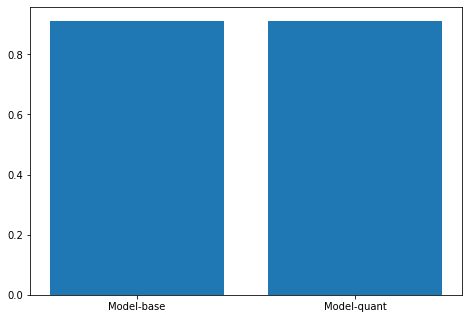

In [41]:
# porównaj dokladnosc wynikowych modeli TFLite

# TODO wyniki przedstaw na wykresie słupkowym (jeden slupek dla model-base, a drugi dla model-quant)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Model-base', 'Model-quant']
accuracy = [result1[0], result2[0]]
ax.bar(models,accuracy)
plt.show()


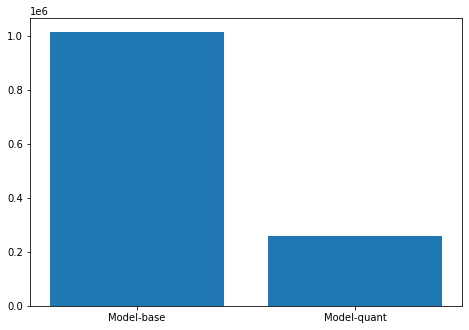

In [47]:
# porównaj rozmiar wynikowych modeli TFLite

# TODO wyniki przedstaw na wykresie słupkowym (jeden slupek dla model-base, a drugi dla model-quant)
import os

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Model-base', 'Model-quant']
size = [os.path.getsize('model-base.tflite'), os.path.getsize('model-quant.tflite')]
ax.bar(models,size)
plt.show()


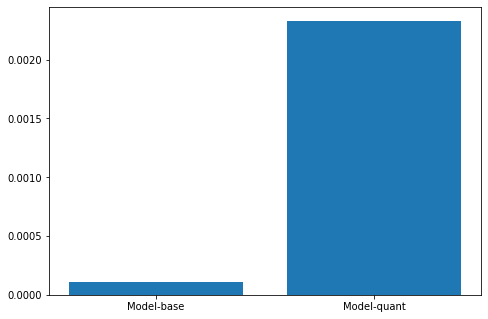

In [43]:
# porównaj czas dzialania wynikowych modeli TFLite

# TODO wyniki przedstaw na wykresie słupkowym (jeden slupek dla model-base, a drugi dla model-quant)
# porównaj dokladnosc wynikowych modeli TFLite

# TODO wyniki przedstaw na wykresie słupkowym (jeden slupek dla model-base, a drugi dla model-quant)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Model-base', 'Model-quant']
latency = [result1[1], result2[1]]
ax.bar(models,latency)
plt.show()

 # Wnioski

**TODO** przedstaw wnioski z przeprowadzonych eksperymentów
Accuracy dla obu modeli jest takie samo, czas działania modeli i rozmiar jest różny. Wynika z tego, że gdy zależy nam na czasie działania to powinniśmy wybrać model bazowy. Jednak gdy mamy ograniczone zasoby pamięciowe i mocowe (np edge devices) to wtedy model kwantowy będzie lepszy.
**TODO** dlaczego czasy działania modeli są różne?
Czas dla modelu kwantowego powinien być mniejszy, bo jego rozmiar jest mniejszy. W naszym przypadku jest inaczej, ale może to być spowodowane tym, że uruchamiamy to na GPU, a tensorflow lite daje gwarancję na szybsze działanie tylko na urządzeniach typu telefon czy edge devices.